<img src="images/titanic.png" width="250" />

<p style="text-align:right">Author: <strong>Kadija Touré</strong><br>Version v3, May 2021</p>

# <span style="background:WhiteSmoke">Data Science Project: Titanic Notebook</span>
## Objective

The aim of this project is to use Machine Learning to create a model that predicts which passengers on the Titanic ocean liner survived her sinking during her maiden voyage in 1912.

## Table of contents
<br>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
  <li>Data acquisition</li>
    <ol>
      <li>Get data</li>
      <li>First insight</li>
    </ol>
  </li>
  <li>Data preprocessing</li>
    <ol>
      <li>Data formatting</li>
      <li>Identifying and handling missing values</li>
      <li>Decomposing data</li>
    </ol>
  </li>
  <li>Exploratory Data Analysis (EDA)</li>
    <ol>
      <li>Visualisation</li>
      <li>Contingency tables</li>
    </ol>
  </li>
  <li>Model development</li>
    <ol>
      <li>Dummy variables</li>
      <li>Random Forest classifier</li>
    </ol>
  </li>
  <li>Model evaluation and final predictions</li>
</div>



---
---

# <span style='background:aliceblue'>1. Data acquisition</span>

The data consists in two separate datasets: `df_train` dataset for passengers for whom the survival to the accident is known, and `df_test` dataset for which we aim to predict that information with the highest accuracy possible.

- data source: https://www.kaggle.com/c/titanic/data
- data type: .csv

## A. Get data

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# enlarge display size
pd.set_option('display.max_columns', 35)

In [3]:
# read the data set files, and assign them to variables df_train and df_test
df_train = pd.read_csv("data/train.csv") 
df_test = pd.read_csv("data/test.csv")

---

## B. First insight

- First, we would like to know how many rows and columns `df_train` and `df_test` have:

In [4]:
print("The training dataset has {} rows and {} columns".format(df_train.shape[0], df_train.shape[1]))
print("The test dataset has {} rows and {} columns".format(df_test.shape[0], df_test.shape[1]))

The training dataset has 891 rows and 12 columns
The test dataset has 418 rows and 11 columns


- Now, let's have a look at the first few rows of each dataset:

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Comment**: We can already see the presence of missing data in both datasets. This will be dealt with later on.

---

- Using the method *DataFrame.info()*, we can generate a concise summary on the datasets:

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Comment**: The presence of missing data is again highlighted. We can also see that columns **PassengerId** and **Pclass** are not of the correct data type - this will be corrected during the data preprocessing.

---

- Lastly, we generate descriptive statistics on all columns within the datasets:

In [9]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carbines, Mr. William",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Drapkin, Miss. Jennie",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


**Comments**: 

- Only **38.38%** of the passengers in `df_train` survived the accident<br>
<br>
- On average, passengers were around 30 years old<br>
<br>
- The majority of the passengers were males and embarked at Southampton<br>
<br>
- On average, passengers were not accompanied by a family member</p>

---
#### <span style='border:2px solid Khaki'>Summary - First insight</span>

- The categorical variables are:
<br>**Survived**, **Pclass**, **Name**, **Sex**, **Ticket**, **Cabin** and **Embarked**<br>
<br>
- The quantitative variables are:
<br>**Age**, **SibSp**, **Parch** and **Fare**<br>
<br>
- Columns **Age**, **Cabin** and **Embarked** in `df_train` have missing values<br>
<br>
- Columns **Age**, **Cabin** and **Fare** in `df_test` have missing values<br>
<br>
- For both datasets, columns **PassengerId** and **Pclass** are not of the correct data type<br>

---
---

# <span style='background:aliceblue'>2. Data preprocessing</span>

## A. Data formatting

We previously observed that **PassengerId** and **Pclass** were not of the correct data type for both datasets – let's correct this:

In [11]:
# convert Series type from integer to string
df_train["PassengerId"] = df_train["PassengerId"].astype(str)
df_train["Pclass"] = df_train["Pclass"].astype(str)

df_test["PassengerId"] = df_test["PassengerId"].astype(str)
df_test["Pclass"] = df_test["Pclass"].astype(str)

In [12]:
df_train[["PassengerId", "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Pclass       891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [13]:
df_test[["PassengerId", "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    object
 1   Pclass       418 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


**Comment**: data types for **PassengerId** and **Pclass** have correctly been changed for both datasets.

---

## B. Identifying and handling missing values

When getting a first insight at the training set, the presence of missing data was highlighted in columns **Age**, **Embarked** and **Cabin**. As missing data could affect the quality of the future model, this section will be focused on detecting and handling them appropriately. 

- The first step we take is to change the index of `df_train` and `df_test` from the default integer index to **PassengerId** – this will come in handy. We will then start identifiying the missing values in both datasets:

In [14]:
# set index
df_train.set_index("PassengerId", inplace=True)
df_test.set_index("PassengerId", inplace=True)

In [15]:
# detect missing values in df_train
missingdata_train = df_train.isna()
missingdata_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False


In [16]:
# detect missing values in df_test
missingdata_test = df_test.isna()
missingdata_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,False,False,False,False,False,False,False,False,True,False
893,False,False,False,False,False,False,False,False,True,False
894,False,False,False,False,False,False,False,False,True,False
895,False,False,False,False,False,False,False,False,True,False
896,False,False,False,False,False,False,False,False,True,False


- In order to count the missing values in `df_train` and `df_test`, we create the following function:

In [17]:
def missingdata_counts(df):
    for column in df:
        print(column) # print column label
        print(df[column].value_counts()) # print Series containing the counts of False and True in column
        print("") # addition of a blank line

In [18]:
# apply function to the training set
missingdata_counts(missingdata_train)

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [19]:
# apply function to the test set
missingdata_counts(missingdata_test)

Pclass
False    418
Name: Pclass, dtype: int64

Name
False    418
Name: Name, dtype: int64

Sex
False    418
Name: Sex, dtype: int64

Age
False    332
True      86
Name: Age, dtype: int64

SibSp
False    418
Name: SibSp, dtype: int64

Parch
False    418
Name: Parch, dtype: int64

Ticket
False    418
Name: Ticket, dtype: int64

Fare
False    417
True       1
Name: Fare, dtype: int64

Cabin
True     327
False     91
Name: Cabin, dtype: int64

Embarked
False    418
Name: Embarked, dtype: int64



**Comments**:

1. `df_train` dataset

- column **Age** has 177 missing values
- column **Cabin** has 687 missing values
- column **Embarked** has 2 missing values

2. `df_test` dataset

- column **Age** has 86 missing values
- column **Fare** has 1 missing values
- column **Cabin** has 327 missing values

---

- **Replacing missing cabin numbers**

At this stage of the project we choose not to fill missing cabin numbers in both datasets for now since columns **Cabin** contain more missing data than known data (687 ~ 77.10% of the training dataset, and 327 ~ 78.23% of the test dataset). Indeed, replacing these missing values would potentially have an important impact on the quality of the future model. 

- **Replacing missing fares and ports of embarkation**

We replace the two missing ports of embarkation in `df_train` by the port with the highest frequency in the dataset: 

In [20]:
# fill missing ports of embarkation in df_train
top_Embarked_train = df_train["Embarked"].mode()[0]
df_train["Embarked"].replace(np.nan, top_Embarked_train, inplace=True)
print("Missing ports of embarkation in the training dataset have been replaced by:", top_Embarked_train)

Missing ports of embarkation in the training dataset have been replaced by: S


For the single missing fare in `df_test`, we have the possibility to replace it by the median or the mean of all fares in the dataset:

In [21]:
# import plotting module pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# import library
import seaborn as sns

In [23]:
# set style sheet reference
plt.style.use('seaborn')

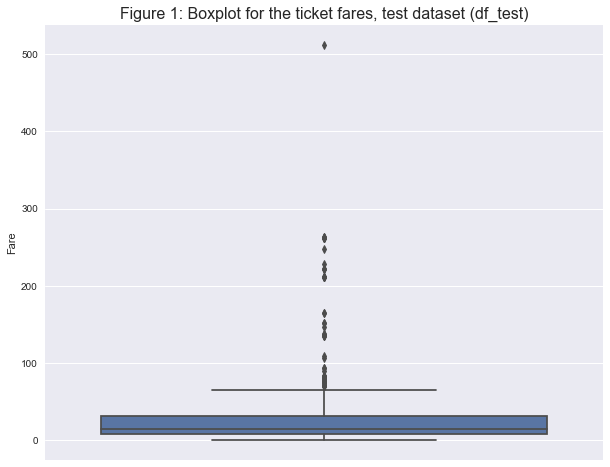

In [24]:
# plot boxplot of the fares
fig1, ax1 = plt.subplots(figsize=(10, 8))

sns.boxplot(y="Fare", data=df_test, ax=ax1)

ax1.set_title("Figure 1: Boxplot for the ticket fares, test dataset (df_test)", fontsize=16)

plt.show()

**Comment**: the boxplot shows a positively skewed distribution, as well as several outliers. Replacing the missing fare by the median fare instead of the mean fare therefore seems more appropriate.<br>
<br>

In [25]:
# fill missing fare in test dataset
median_Fare_test = df_test["Fare"].median()
df_test["Fare"].replace(np.nan, median_Fare_test, inplace=True)
print("Missing fare in the test dataset has been replaced by:", median_Fare_test)

Missing fare in the test dataset has been replaced by: 14.4542


- **Replacing missing ages**

Given the high numbers of missing ages in the training (177 ~ 19.87% of the dataset) and test (86 ~ 20.57% of the dataset) datasets, simply replacing them with the median or the mean doesn't seem ideal. Passengers could potentially belong to different age groups depending on their categories: sex, title and possibly even ticket class. Let's see if this can indeed be observed in the datasets.

First, we need to extract the title of each passenger using the columns **Name**:

In [26]:
# split strings in Name around delimiters
Name_train = df_train["Name"].str.split(pat=r"[,.]", n=2, expand=True) # Raw String as r"expression"
Name_test = df_test["Name"].str.split(pat=r"[,.]", n=2, expand=True)

The following outputs are obtained: 

In [27]:
Name_train.head()

,0,1,2
PassengerId,,,
1,Braund,Mr,Owen Harris
2,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss,Laina
4,Futrelle,Mrs,Jacques Heath (Lily May Peel)
5,Allen,Mr,William Henry


In [28]:
Name_test.head()

,0,1,2
PassengerId,,,
892,Kelly,Mr,James
893,Wilkes,Mrs,James (Ellen Needs)
894,Myles,Mr,Thomas Francis
895,Wirz,Mr,Albert
896,Hirvonen,Mrs,Alexander (Helga E Lindqvist)


In [29]:
# return all unique titles
Name_train.iloc[:, 1].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [30]:
Name_test.iloc[:, 1].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

**Comment**: Across the training and test sets, each passenger has one of the 18 following titles:

- *Mrs, Miss, Mme, Ms, Lady, Mlle, the Countess, Dona, Dr*
- *Mr, Master, Don, Rev, Capt, Major, Sir, Col, Jonkheer*

We now add these new columns to the original datasets in order to perform further analysis:

In [31]:
# rename columns
Name_train.rename({0:"Surname", 1:"Title", 2:"Forenames"}, axis=1, inplace=True)
Name_test.rename({0:"Surname", 1:"Title", 2:"Forenames"}, axis=1, inplace=True)

# strip whitespaces
Name_train["Title"] = Name_train["Title"].str.strip()
Name_train["Forenames"] = Name_train["Forenames"].str.strip()

Name_test["Title"] = Name_test["Title"].str.strip()
Name_test["Forenames"] = Name_test["Forenames"].str.strip()

In [32]:
# concatenate Dataframes
df_train = pd.concat([df_train, Name_train], axis=1)
df_test = pd.concat([df_test, Name_test], axis=1)

We saw earlier that there are 18 different titles across all passengers. When searching for their meaning and to whom they are traditionally given, we concluded that some of them can be categorised - which will allow us to reduce the number of unique values in the columns **Title**:

- *Lady, the Countess, Dona, Don, Sir, Jonkheer* $\Rightarrow$ **Noble**
- *Major, Capt, Col* $\Rightarrow$ **Officer**
- *Dr, Rev* $\Rightarrow$ **Other professional**
- *Mrs, Mme, Ms* $\Rightarrow$ **Mrs**
- *Miss, Mlle* $\Rightarrow$ **Miss**

The remaining titles are **Mr** and **Master** (a way of politely addressing boys and young men) which we consider to be categories of their own. As a result, we have **7 categories** in total. 

For both `df_train` and `df_test`, we then substitute the values in the columns **Title** with the categories we just defined:

In [33]:
# create dictionnary
dict_Title = {"Lady":"Noble",
              "the Countess":"Noble",
              "Dona":"Noble",
              "Don":"Noble",
              "Sir":"Noble",
              "Jonkheer":"Noble",
              "Major":"Officer",
              "Capt":"Officer",
              "Col":"Officer",
              "Dr":"Other professional",
              "Rev":"Other professional",
              "Mrs":"Mrs",
              "Mme":"Mrs",
              "Ms":"Mrs",
              "Miss":"Miss",
              "Mlle":"Miss",
              "Mr":"Mr",
              "Master":"Master"}

In [34]:
# substitute values with those derived from the dictionnary
df_train["Title"] = df_train["Title"].map(dict_Title)
df_test["Title"] = df_test["Title"].map(dict_Title)

It is now time to calculate the median ages of the passengers based on their sex, ticket class and title. These will be used to replace the missing values in **Age** columns in `df_train` and `df_test`.

In [35]:
# extract subsets from DataFrames
sbt1_train = df_train[["Sex", "Pclass", "Title", "Age"]]
sbt1_test = df_test[["Sex", "Pclass", "Title", "Age"]]

# create pivot tables
pvt1_train = pd.pivot_table(sbt1_train, index=["Sex", "Pclass"], columns="Title", aggfunc=np.median)
pvt1_test = pd.pivot_table(sbt1_test, index=["Sex", "Pclass"], columns="Title", aggfunc=np.median)

In [36]:
pvt1_train

Age                                                   
Title         Master  Miss    Mr   Mrs Noble Officer Other professional
Sex    Pclass                                                          
female 1         NaN  30.0   NaN  40.0  40.5     NaN               49.0
       2         NaN  24.0   NaN  31.5   NaN     NaN                NaN
       3         NaN  18.0   NaN  31.0   NaN     NaN                NaN
male   1         4.0   NaN  40.0   NaN  40.0    56.0               44.0
       2         1.0   NaN  31.0   NaN   NaN     NaN               46.5
       3         4.0   NaN  26.0   NaN   NaN     NaN                NaN

In [37]:
pvt1_test

Age                                                   
Title         Master  Miss    Mr   Mrs Noble Officer Other professional
Sex    Pclass                                                          
female 1         NaN  32.0   NaN  48.0  39.0     NaN                NaN
       2         NaN  19.5   NaN  29.0   NaN     NaN                NaN
       3         NaN  22.0   NaN  28.0   NaN     NaN                NaN
male   1         9.5   NaN  42.0   NaN   NaN    50.0               53.0
       2         5.0   NaN  28.0   NaN   NaN     NaN               35.5
       3         7.0   NaN  25.0   NaN   NaN     NaN                NaN

**Comment**: The range of median ages is large across each dataset. When looking at the training dataset for example, we see that the median age for passengers in the 1st class with the title *Master* is 4 while it is 56 for passengers in the same class but with an officer rank (*Officer* category). 

---

The above observation supports our initial idea of replacing missing ages in the datasets based on the groups each passenger falls into. In order to so, we create a function called *fill_ages*:

In [38]:
def fill_ages(data):
    """
    parameters
    ----------
    data: DataFrame
        One-dimensional ndarray with axis labels.
    """
    # extract subset for which passenger age is missing
    sbst = data[data["Age"].isna()][["Sex", "Pclass", "Title", "Age"]]
    sbst = sbst.reset_index().set_index(["Sex", "Pclass", "Title"]) # insert initial index into DataFrame columns, and set index
    NB1_sbst = sbst.shape[0] # number of missing ages to be filled  
    
    # create table containing median ages based on sex, ticket class and title
    tbl = data[["Sex", "Pclass", "Title", "Age"]].groupby(by=["Sex", "Pclass", "Title"]).median()
    
    # fill missing ages in d with median ages in t
    sbst.update(tbl)
    sbst = sbst.set_index("PassengerId") 
    NB2_sbst = sbst.shape[0]
    
    # fill missing ages in data with newly-filled ages in sbst
    data.update(sbst)
    
    # calculate proportion of missing ages which have been filled (expected result is 100%)
    ratio = (NB2_sbst/NB1_sbst)*100
    
    # print(ratio, "of the missing ages have been filled.")
    print(ratio, "% of the missing ages in the dataset have been filled as per the following Series:")
    
    return(sbst)

In [39]:
# apply function to training dataset
fill_ages(df_train)

100.0 % of the missing ages in the dataset have been filled as per the following Series:


,Age
PassengerId,
6,26.0
18,31.0
20,31.0
27,26.0
29,18.0
...,...
860,26.0
864,18.0
869,26.0


In [40]:
fill_ages(df_test)

100.0 % of the missing ages in the dataset have been filled as per the following Series:


,Age
PassengerId,
902,25.0
914,48.0
921,25.0
925,28.0
928,22.0
...,...
1300,22.0
1302,22.0
1305,25.0


Lastly, we save the modified training and test datasets:

In [41]:
# Save the modified dataframes as csv
df_train.to_csv("data/clean_train.csv")
df_test.to_csv("data/clean_test.csv")

---

## C. Decomposing data

Variable **Ticket** is complex: some ticket references have what we believe to be an acronym, others only have a number sequence and the remaining ones have a combination of both. Decomposing this variable into multiple parts will be helpful in capturing potential relationships later on.

In [42]:
# create utility function
def decompose_ticket(df):
    sbst = df["Ticket"]
    outcome = pd.DataFrame(data=np.nan, index=df.index, columns=["Ticket_acr", "Ticket_seq"]) # acr(onym) seq(uence)
    
    # s1 = pd.Series(data=np.nan, index=df.index, name="Ticket_acr")
    # s2 = pd.Series(data=np.nan, index=df.index, name="Ticket_seq")
    for i in sbst.index:
        if sbst.loc[i].isnumeric():
            outcome.loc[i, "Ticket_seq"] = sbst.loc[i]
            # s2.loc[i] = sbst.loc[i]
        elif sbst.loc[i].isalpha():
            outcome.loc[i, "Ticket_acr"] = sbst.loc[i]
            # s1.loc[i] = sbst.loc[i]
        else:
            L = sbst.loc[i].split(maxsplit=1)
            outcome.loc[i, "Ticket_acr"] = L[0]
            outcome.loc[i, "Ticket_seq"] = L[1]
            # s1.loc[i] = L[0]
            # s2.loc[i] = L[1]
    # pd.concat([df, s1, s2], axis=1)
    return(outcome)

In [43]:
# Apply function
TicketParts_train = decompose_ticket(df_train)
TicketParts_test = decompose_ticket(df_test)

In [44]:
# Concatenate DataFrames
df_train = pd.concat([df_train, TicketParts_train], axis=1)
df_test = pd.concat([df_test, TicketParts_test], axis=1)

In [45]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Forenames,Ticket_acr,Ticket_seq
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,A/5,21171
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),PC,17599
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,STON/O2.,3101282
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),NaN,113803
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN,373450


In [46]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Forenames,Ticket_acr,Ticket_seq
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr,James,NaN,330911
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs,James (Ellen Needs),NaN,363272
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr,Thomas Francis,NaN,240276
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr,Albert,NaN,315154
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist),NaN,3101298


- Let's have a closer look at the ticket acronyms in the datasets:

In [47]:
# count missing ticket acronyms
df_train["Ticket_acr"].isna().value_counts()

True     661
False    230
Name: Ticket_acr, dtype: int64

In [48]:
df_test["Ticket_acr"].isna().value_counts()

True     296
False    122
Name: Ticket_acr, dtype: int64

**Comment**: The majority of the tickets (661 ~ 74.18% of the training dataset, and 296 ~ 70.81% of the test dataset) do not have acronyms. 

In [49]:
# count unique ticket acronyms
df_train["Ticket_acr"].value_counts()

PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
SOTON/O.Q.     8
CA.            8
A/5.           7
SOTON/OQ       7
CA             6
STON/O2.       6
F.C.C.         5
S.O.C.         5
C              5
SC/PARIS       5
LINE           4
SC/Paris       4
SC/AH          3
A/4            3
PP             3
S.O./P.P.      3
A/4.           3
S.C./PARIS     2
A.5.           2
SOTON/O2       2
WE/P           2
A./5.          2
P/PP           2
SW/PP          1
F.C.           1
S.P.           1
W/C            1
S.O.P.         1
C.A./SOTON     1
SC             1
S.W./PP        1
A4.            1
SO/C           1
Fa             1
W.E.P.         1
SCO/W          1
S.C./A.4.      1
A/S            1
Name: Ticket_acr, dtype: int64

In [50]:
df_test["Ticket_acr"].value_counts()

PC            32
C.A.          19
SOTON/O.Q.     8
SC/PARIS       6
W./C.          5
S.O./P.P.      4
CA             4
F.C.C.         4
CA.            4
A/5.           3
A/4            3
C              3
F.C.           2
S.O.C.         2
STON/O         2
SC/AH          2
A/5            2
SC/Paris       1
AQ/4           1
LP             1
SC             1
A.             1
STON/O2.       1
S.C./PARIS     1
A./5.          1
AQ/3.          1
SC/A4          1
SOTON/O2       1
A.5.           1
PP             1
STON/OQ.       1
W.E.P.         1
SOTON/OQ       1
SC/A.3         1
Name: Ticket_acr, dtype: int64

**Comments**: The acronyms are quite diverse. In order to decrypt them, we made some research on cruise terminology and extracted some passengers data (e.g. ticket class, port of embarkation, surnames etc.) for each ticket acronym to see if we could find patterns. 

The results are presented below – unfortunately we couldn't decrypt all of them:

- **STON** or **SOTON** refers to *Southampton*, departure port of embarkation<br>
$\rightarrow$ the information provided in this acronym is similar to the one provided by **Embarked** variable
- **SC** refers to *Second Class*<br>
$\rightarrow$ the information provided in this acronym is similar to the one provided by **Pclass** variable
- **LP** could potentially refer to *Loyalty Program*
- **A** could mean *Aft*, suggesting that the passenger cabin was located at the rear of the ship
- **S.O.C.** or simply **SO** could refer to *Single Occupancy (Cabin)*, sole occupancy of a cabin which is designed to accommodate more than one passenger

We can see that the type of information the acronyms provide is not homogeneous across the values. Decomposing **Ticket_acr** into multiple independent parts that would each convey one single piece of information would be needed, but this would require to decrypt all acronyms in the first place.

For all the above reasons – and considering that a high proportion (over 70%) of the tickets do not have any acronyms – it seems best not to consider **Ticket_acr** as a potential good predictor of the target variable.

---

- Let's now have a closer look at the ticket number sequences in the datasets:

In [51]:
# count missing ticket number sequences
df_train["Ticket_seq"].isna().value_counts()

False    887
True       4
Name: Ticket_seq, dtype: int64

In [52]:
df_test["Ticket_seq"].isna().value_counts()

False    418
Name: Ticket_seq, dtype: int64

In [53]:
# count unique ticket number sequences
df_train["Ticket_seq"].value_counts()

2343       7
347082     7
1601       7
3101295    6
347088     6
          ..
248733     1
364512     1
113784     1
3474       1
2689       1
Name: Ticket_seq, Length: 678, dtype: int64

In [54]:
df_test["Ticket_seq"].value_counts()

17608     5
113503    4
2343      4
220845    3
347077    3
         ..
347091    1
3470      1
2168      1
244346    1
2698      1
Name: Ticket_seq, Length: 362, dtype: int64

**Comment**: **Ticket_seq** has four missing values in the training dataset, and none in the test dataset. We also observe that ticket number sequences were not unique – some were shared between passengers who probably bought them together as groups (relatives, acquaintances etc.).

The number sequence associated to each passenger ticket is probably not random, and some information could potentially be extracted from them. In order to check this hypothesis, getting insight on the ticket numbering system the line used would be required – but our search for this information was not conclusive. 

As a result, it seems best to exclude **Ticket_seq** from the list of potential good predictors of the target variable.

---
#### <span style='border:2px solid Khaki'>Summary - Data pre-processing</span>
    
- Data types for **PassengerId** and **Pclass** have been changed from *integer* to *string*<br>
<br>
- **PassengerId** was set as index<br>
<br>
- Missing ages were replaced based on the sex, ticket class and title of each passenger<br>
<br>
- The two missing port of embarkation in the training dataset were replaced by the port with the highest frequency: S (for Southampton)<br>
<br>
- The single missing fare in the test dataset was replaced by the median of all fares<br>
<br>
- Due to a high proportion (over 75%) of missing cabin numbers in both datasets, we chose not to replace them. The cabin numbers will therefore not be considered as a good predictor of the target variable.<br>
<br>
- After decomposing **Ticket**, it seemed best not to consider it as a good predictor of the target variable.<br>

---
---

# <span style='background:aliceblue'>3. Exploratory Data Analysis (EDA)</span>

The objective is to narrow down the list of potential good predictors for the target variable **Survived**. What we have learnt so far about the datasets resulted in excluding **Cabin** and **Ticket**. After decomposing **Name**, we can also exclude **Surname** and **Forenames** as these are identifiers for each passenger – there are not predictive. The table below summarises this information:

| | Pclass | Name | Sex | Age | SibSp | Parch | Ticket | Fare | Cabin | Embarked | Surname | Title | Forenames |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **Potential good predictor** | $\checkmark$ | – | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | – | $\checkmark$ | – | $\checkmark$ | – | $\checkmark$ | – |
<br>

In this section, analysis will be performed on the training dataset `df_train`.

## A. Visualisation



- We start by generating the scatterplot matrix of our training data:

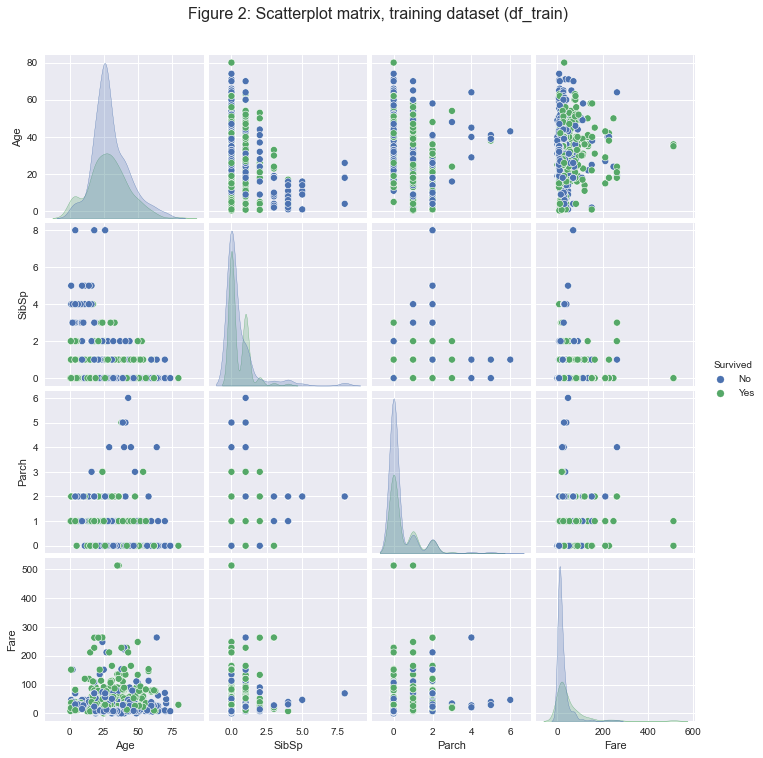

In [55]:
# plot scatterplot matrix
scatter_mtx = sns.pairplot(data=df_train, hue="Survived")

# set Text instances in the legend
lgd2 = scatter_mtx.legend

lgd2.get_texts()[0].set_text("No")
lgd2.get_texts()[1].set_text("Yes")

# set Title
fg2 = scatter_mtx.fig
fg2.suptitle("Figure 2: Scatterplot matrix, training dataset (df_train)", y=1.05, fontsize=16)

plt.show()

**Comment**: Looking at the scatterplots, differentiating passengers who survived from those who did not is quite complex as they are not easily identifiable by one or more variables. 

We can however gain some interesting insight with the distribution plots. For example, the age distribution shows that the KDE plots for the two categories of passengers intersect at x ~ 12 years old. We compared the surfaces under the plots for x $\le$ 12, and the one related to passengers who did survive is bigger. This means that passengers under the age of 12 (approximately) had a higher probability to survive the accident. 

---

- Following this observation on the age distributions, it would be interesting to introduce the **Sex** variable:

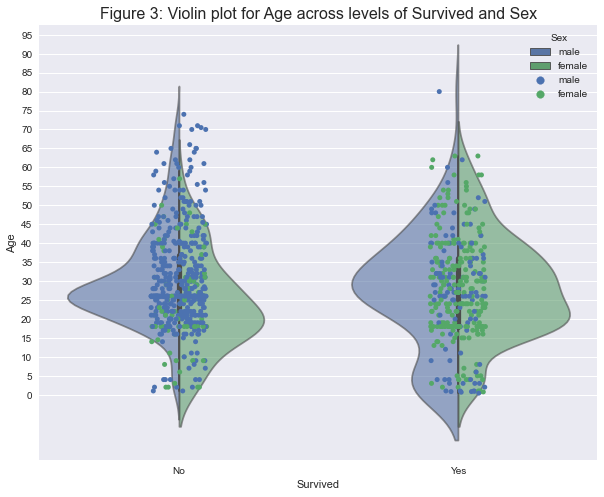

In [56]:
# plot violin plot for Age across Survived and Sex
fig3, ax3 = plt.subplots(figsize=(10,8))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=df_train, ax=ax3, split=True)

# plot strip plot as a complement
sns.stripplot(x="Survived", y="Age", hue="Sex", data=df_train, ax=ax3)

# set alpha on PolyCollection objects
for i in [0, 1, 3, 4]:
    ax3.collections[i].set_alpha(0.6)
    
# set Text instances in the legend
lgd3 = scatter_mtx.legend

lgd2.get_texts()[0].set_text("No")
lgd2.get_texts()[1].set_text("Yes")

# set Title
ax3.set_title("Figure 3: Violin plot for Age across levels of Survived and Sex", fontsize=16)

# set ticks and labels on axis
ax3.set_yticks(np.arange(0, 100, 5))
ax3.set_xticklabels(["No", "Yes"])

plt.show()

**Comments**: The first thing we notice is that most victims were males while most survivors were females.

- *Among victims*

By comparing the surfaces under the two KDE plots, we can also say that the probability a female passenger was aged under 20 years old was higher than the equivalent probability among male passengers. 

For female passengers, the probability density then starts decreasing. On the other hand, it increases for the male population and reaches a peak at 25 years old. As a result, the probability a male passenger was aged above 25 years old was higher than the equivalent probability among female passengers. 

- *Among survivors*

Here, we can say that the probability a female passenger was aged under 12 years old was lower than the equivalent probability among male passengers. 

For female passengers, the probability density then starts increasing and reaches a maximum at 20 years old before decreasing again. It also increases for the male population and reaches a mode at 30 years old.

Overall, the surface area under the plot for male passengers over 12 years old is smaller than the equivalent surface area for female passengers. As a result, the probability a male passenger was aged above 12 years old was lower than the equivalent probability among the female passengers.

- *To sum up*:

    1. A female victim had higher chances to be aged under 20 years old compared to a male victim
    2. A male victim had higher chances to be aged 25 years old and above compared to a female victim
    3. A female survivor had lower chances to be aged under 12 years old compared to a male survivor
    4. A male survivor had lower chances to be aged above 12 years old compared to a female survivor

---

- We are now interested in the distribution of the number of parents/children aboard the Titanic among the victims and the survivors:

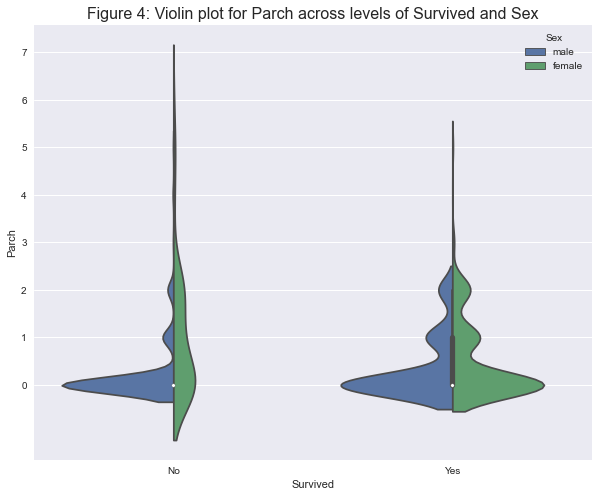

In [57]:
# plot violin plot for Parch across Survived and Sex
fig4, ax4 = plt.subplots(figsize=(10, 8))

sns.violinplot(x="Survived", y="Parch", hue="Sex", data=df_train, ax=ax4, split=True)

# set title
ax4.set_title("Figure 4: Violin plot for Parch across levels of Survived and Sex", fontsize=16)

# set ticks and labels on axis
ax4.set_yticks(np.arange(0, 8))
ax4.set_xticklabels(["No", "Yes"])

plt.show()

**Comments**: 
- *Among victims*

The probability a male passenger had no parent/child accompanying them was higher than the equivalent probability among female passengers.

The probability for a female passenger to have at least one parent/child was higher than the equivalent probability among male passengers.

- *Among survivors*

The probability densities look similar and both present three modes which get lower when the number of parents/children increases. 

The probability for a female passenger to have at least one parent/child was higher than the equivalent probability for male passengers.

On the other hand, the probability for a male passenger to have no parent/child was greater than the equivalent probability for female passengers. 

- *To sum up*:

    1. Across the survivors or the victims, the chances for a male passenger to have no parent/child aboard the ship was higher than for a female passenger
    2. Across the survivors or the victims, a female passenger had higher chances to have at least one parent/child aboard the ship compared to a male passenger

--- 

- Similarly, we would like to observe the distribution of the number of siblings/spouses aboard the Titanic across the victims and survivors of the accident:

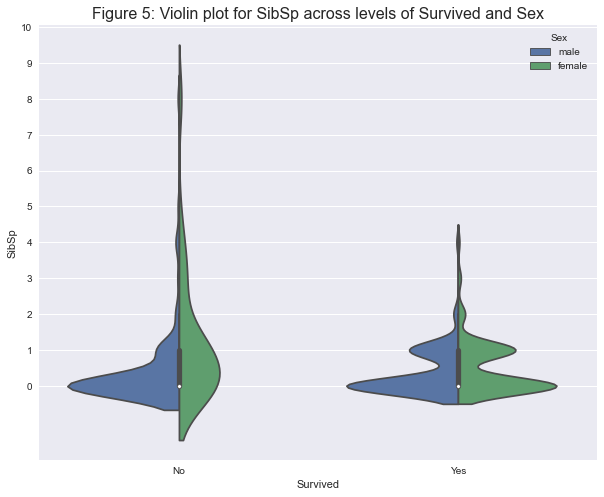

In [58]:
# plot violin plot for SibSp across Survived and Sex
fig5, ax5 = plt.subplots(figsize=(10, 8))

sns.violinplot(x="Survived", y="SibSp", hue="Sex", data=df_train, ax=ax5, split=True)

# set title
ax5.set_title("Figure 5: Violin plot for SibSp across levels of Survived and Sex", fontsize=16)

# set ticks on y-axis
ax5.set_yticks(np.arange(0, 11))
ax5.set_xticklabels(["No", "Yes"])

plt.show()

**Comments**:
- *Among victims*

For male passengers, the probability not to have any sibling/spouse aboard the ship was at least twice as high as the one for female passengers. On the other hand, the probability for a female passenger to have at least one or more siblings/spouses was higher than for a male passenger. 

- *Among survivors*

The plots look fairly similar. Additionally, we observe the same trends as among victims: the probability for a male passenger to have no sibling/spouse was higher than for a female passenger while the probability for a female passenger to have one or more siblings/spouses was higher than for a male passenger.

- *To sum up*:

    1. Across the survivors or the victims, a male passenger had higher chances not to have any sibling/spouse aboard the ship compared to a female passenger 
    2. Across the survivors or the victims, a female passenger had higher chances to have one or more siblings aboard the ship compared to a male passenger

---

- Finally, we take a look at the ticket fares. Although we might be inclined to think that the ticket classes are likely to have an influence on the ticket fares, it is best to analyse our data to confirm (or refute) it. We will then introduce the target variable:

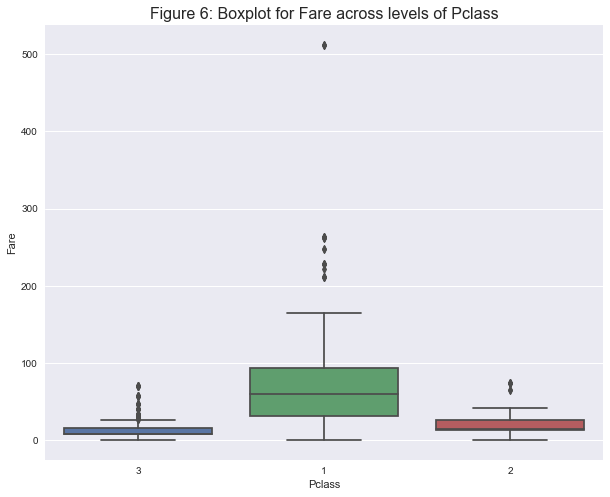

In [59]:
# plot boxplot Fares vs Pclass
fig6, ax6 = plt.subplots(figsize=(10,8))

sns.boxplot(x="Pclass", y="Fare", data=df_train, ax=ax6)

# set title
ax6.set_title("Figure 6: Boxplot for Fare across levels of Pclass", fontsize=16)

plt.show()

**Comment**: The three ticket classes have different median fares, but the one for the first class is much higher than those for the lower classes. 

The median fare for the third class lies outside the box for the second class. Similarly, the median fare for the first class lies outside the boxes for the lower classes. The box lengths and whiskers also suggest that the higher the class, the more dispersed the fares. 

As a result, there is likely to be a difference between the three groups. Supposing all assumptions are met, a One-Way ANOVA could eventually be performed to determine whether or not this is also suggested by the statistics.

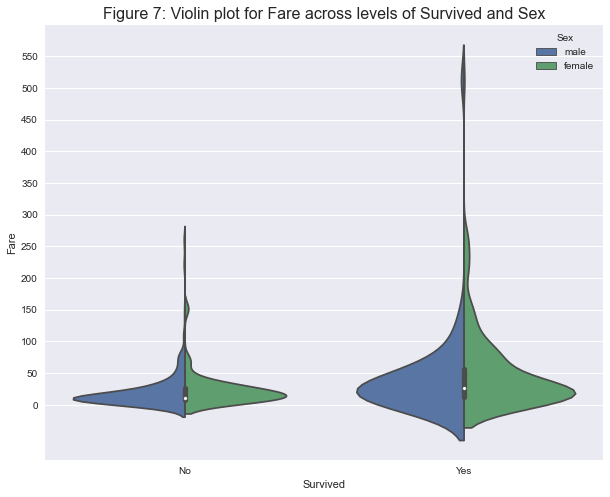

In [60]:
# create violin plot for Fare across Survived and Sex
fig7, ax7 = plt.subplots(figsize=(10, 8))

sns.violinplot(x="Survived", y="Fare", hue="Sex", data=df_train, ax=ax7, split=True)

# set title
ax7.set_title("Figure 7: Violin plot for Fare across levels of Survived and Sex", fontsize=16)

# set ticks on y-axis
ax7.set_yticks(np.arange(0, 600, 50))
ax7.set_xticklabels(["No", "Yes"])

plt.show()

**Comments**: The first thing we notice is that overall, the ranges of fares among survivors were much greater than the ones among victims. 

- *Among victims*

The two plots are similar in shape and stop at around 280 currency units. 
Across males and females, the majority paid a ticket fare between 0 and 50 currency units. Above 50 currency units, the probability a male passenger paid such a fare was higher than the equivalent probability for a female passenger. 

- *Among survivors*

The two plots are also similar in shape and stop at around 570 currency units. We can see that the probability a female passenger paid a ticket fare above 50 currency units was higher than the equivalent probability for a male passenger.

---

## B. Contingency tables

Contingency tables are an easy way to explore the categorical data by presenting it in terms of observed frequencies. We will then conduct the $\chi^2$ test to help us decide whether or not some variables are independent from each other.

- Table 1: **Survived** vs. **Sex**

In [61]:
t1 = pd.crosstab(df_train["Sex"], df_train["Survived"])
t1

Survived,0,1
Sex,,
female,81,233
male,468,109


- **Comment**: The majority of the passengers were males, but the majority of those who survived were females. 

In [62]:
# import module
from scipy import stats

In [63]:
# chi-square test of independence of variables
chi2_t1, p_t1, dof_t1, expctd_t1 = stats.chi2_contingency(t1)

In [64]:
chi2_t1, p_t1, dof_t1, expctd_t1

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

- **Comment**: In order, the values are the $\chi^2$ value (260.717), the p-value (1.197e-58), the degree of freedom (1) and finally the expected frequencies as an array. According to the Cochran's criterion, the test is valid if all expected frequencies are 1 or greater and at least 80% of the expected frequencies are 5 or greater. The results of the $\chi^2$ test show that the criterion is met, so the results are considered to be valid (i.e. can be trusted). And since the p-value is lower than 0.05, the results indicate the existence of a relationship between the sex of the passengers and whether or not they survived the accident. 

---

- Table 2: **Survived** vs. **Pclass**

In [65]:
t2 = pd.crosstab(df_train["Pclass"], df_train["Survived"])
t2

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


- **Comment**: Across the first class, much more passengers survived the accident (62.96%) than across the third class (24.24%).

In [66]:
chi2_t2, p_t2, dof_t2, expctd_t2 = stats.chi2_contingency(t2)

In [67]:
chi2_t2, p_t2, dof_t2, expctd_t2

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

- **Comment**: The results show that the Cochran's criterion is met, so they can be trusted. They also show a p-value lower than 0.05, and thus indicate that there is a relationship between the class a passenger was in and them surviving or not the accident.

---

- Table 3: **Survived** vs. **Embarked**

In [68]:
t3 = pd.crosstab(df_train["Embarked"], df_train["Survived"])
t3

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


- **Comment**: The results are not as striking as for **Pclass** (see Table 2), but we do observe that the survival rates of the passengers were not equal across the three ports of embarkation. The highest survival rate was for passengers who embarked at Cherbourg (55.36%), followed by Queenstown (38.96%) and finally Southampton (33.90%).

In [69]:
chi2_t3, p_t3, dof_t3, expctd_t3 = stats.chi2_contingency(t3)

In [70]:
chi2_t3, p_t3, dof_t3, expctd_t3

(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

- **Comment**: The results show that the Cochran's criterion is met, so they can be trusted. They also show a p-value lower than 0.05, and thus indicate that there is a relationship between the port of embarkation of a passenger and whether or not they survived the accident.

---

- Table 4: **Survived** vs. **Title**

In [71]:
t4 = pd.crosstab(df_train["Survived"], df_train["Title"])
t4

Title,Master,Miss,Mr,Mrs,Noble,Officer,Other professional
Survived,,,,,,,
0,17,55,436,26,2,3,10
1,23,129,81,101,3,2,3


**Comment**: The two title groups across which most passengers survived the accident were *Mrs* (79.53%) and *Miss* (70.11%). This is consistent with the previous observation that the majority of passengers who survived were females (see Figure 3).

In [72]:
chi2_t4, p_t4, dof_t4, expctd_t4 = stats.chi2_contingency(t4)

In [73]:
chi2_t4, p_t4, dof_t4, expctd_t4

(290.4704979367234,
 8.999683683746529e-60,
 6,
 array([[ 24.64646465, 113.37373737, 318.55555556,  78.25252525,
           3.08080808,   3.08080808,   8.01010101],
        [ 15.35353535,  70.62626263, 198.44444444,  48.74747475,
           1.91919192,   1.91919192,   4.98989899]]))

**Comment**: The p-value is lower than 0.05, so the results suggest that **Survived** and **Title** are not independent variables. However, we observe that less than 80% of the expected frequencies are 5 or greater. The Cochran's criterion is therefore not met and the validity of the $\chi^2$ test is questioned.

On way to obtain valid results, no matter their outcome (i.e. independence or not), is to have a look at the contingency table and see if it would make sense to group some classes together. For Table 4, we concluded that classes *Officer* and *Other professional* could be grouped together. Indeed, these are the only classes in **Title** which refer to the profession of a passenger. All the other classes refer to their marital or societal status. 
- Let's apply a $\chi^2$ test on this new contingency table:

In [74]:
# create copy of DataFrame
t4_new = t4.copy()

# sum columns and affect results to a new column
t4_new["Professional"] = t4_new["Officer"].add(t4_new["Other professional"])

# drop unnecessary columns
t4_new.drop(["Officer", "Other professional"], axis=1, inplace=True)
t4_new

Title,Master,Miss,Mr,Mrs,Noble,Professional
Survived,,,,,,
0,17,55,436,26,2,13
1,23,129,81,101,3,5


In [75]:
chi2_t4_new, p_t4_new, dof_t4_new, expctd_t4_new = stats.chi2_contingency(t4_new)

In [76]:
chi2_t4_new, p_t4_new, dof_t4_new, expctd_t4_new

(290.0332211065648,
 1.3901480936748393e-60,
 5,
 array([[ 24.64646465, 113.37373737, 318.55555556,  78.25252525,
           3.08080808,  11.09090909],
        [ 15.35353535,  70.62626263, 198.44444444,  48.74747475,
           1.91919192,   6.90909091]]))

**Comment**: Here, the results show that the Cochran's criterion is met. They therefore can be trusted. They also show a p-value lower than 0.05, and thus indicate the existence of a relationship between the title a passenger had and whether or not they survived the accident.

- **Title** could therefore be seen as a good predictor of **Survived** when all instances of *Officer* and *Other professional* are grouped together under the same umbrella: *Professional*. In anticipation of the future model development, let's update **Title** accordingly for the training and test datasets.

In [77]:
# create dictionnary
dict_Pro = {"Officer":"Professional",
             "Other professional":"Professional"}

In [78]:
# replace values with those derived from the dictionnary
df_train["Title"].replace(dict_Pro, inplace=True)
df_test["Title"].replace(dict_Pro, inplace=True)

In [79]:
df_train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Professional'],
      dtype=object)

In [80]:
df_test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Professional', 'Noble'],
      dtype=object)

**Comment**: The replacements have correctly been implemented for both datasets.

---
#### <span style='border:2px solid Khaki'>Summary - Exploratory Data Analysis (EDA)</span>

- We visualised the strip plot of **Sex** across levels of **Survived**, and concluded that the sex of a passenger likely had an influence on whether or not they survived the accident. **Sex** should therefore remain part of the list of potential good predictors of the target variable **Survived**.<br>
<br>
- We visualised the distribution plots of all numerical data across levels of **Survived** and **Sex**, and the outcomes suggested that **Age**, **Parch**, **SibSp** and **Fare** could still be considered as good potential predictors of the target variable.<br>
<br>
- For the categorical data, we opted for conducting the $\chi^2$ test to understand if relationships might exist with the target variable. The results were positive for **Sex** (which was already suggested by the strip plot), **Pclass** and **Embarked**.<br>
<br>
- For **Title**, the results of the $\chi^2$ test were not positive with the initial classes. After grouping some of them together in a way that would make sense, we re-conducted the test and the results were positive. In anticipation of the future model development, we updated **Title** accordingly for both the training and test datasets.<br>
<br>
The following features will be used for the future model development:

|       |       | Features |    |       | 
| :---: | :---: | :---: | :---: | :---: |
| **Categorical** | Pclass | Sex | Embarked | Title |
| **Numerical** | Age | SibSp | Parch | Fare |

---
---

# <span style='background:aliceblue'>4. Model development</span>

The target variable **Survived** is dichotomous so predicting it implies solving a classification problem. Since we previously saw that the classes (0: *No*, 1:*Yes*) were not linearly separable from each other (see Figure 2), we chose to fit a Random Forest classifier.

In [81]:
# import module
from sklearn.ensemble import RandomForestClassifier

# import functions
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [82]:
# place features in separate DataFrames
features_train = df_train.drop(["Survived", "Name", "Ticket", "Cabin", "Surname", "Forenames", "Ticket_acr", "Ticket_seq"], axis=1)
features_test = df_test.drop(["Name", "Ticket", "Cabin", "Surname", "Forenames", "Ticket_acr", "Ticket_seq"], axis=1)

In [83]:
# place target in separate DataFrame
target = df_train["Survived"]

## A. Dummy variables

Before fitting a Random Forest, it is required for the features and target to be numerical. We will therefore create dummy variables for all categorical features in both the training and test datasets.

In [84]:
# create dummy variables for the features
features_train = pd.get_dummies(features_train, prefix=["Pclass", "Sex", "Embarked", "Title"])
features_test = pd.get_dummies(features_test, prefix=["Pclass", "Sex", "Embarked", "Title"])

In [85]:
features_train.head(5)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Professional
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0,0,0
4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1,0,0
5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0,0,0


In [86]:
features_test.head(5)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Professional
PassengerId,,,,,,,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0,0,0,1,0,0,0
893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,0,0,0,1,0,0
894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0,0,1,0,0,0
895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0,0,1,0,0,0
896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,0,0,0,1,0,0


**Comment**: The dummy variables have correctly been implemented for both the training and test datasets.

## B. Random Forest classifier

The features for `df_train` and `df_test` datasets were previously defined. `df_test` contains data about passengers we aim to predict the survival to the Titanic sinking, so its features will not be used to fit the model.<br>

Instead, we will use the features and target of `df_train` and randomly split them into a *training subset* (`X_train`, `y_train`) and a *testing subset* (`X_test`, `y_test`): this will allow us to hold out part of the available data when training the future model.<br> 
As we previously highlighted a strong disparity between the target classes (only 38.38% of passengers in `df_train` survived the accident, see **<span style='background:aliceblue'>1. Data acquisition</span>** section), we will use stratify sampling to ensure the same proportion of classes is retained in the split.

In [87]:
# split features and target of the training dataset df_train
X_train, X_test, y_train, y_test = train_test_split(features_train, target, test_size=0.2, random_state=42, stratify=target)

In [88]:
# create Random Forest object
rnd_forest = RandomForestClassifier(oob_score=True, random_state=42)

In [89]:
# fit Random Forest object
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

- Now that the Random Forest has been fitted, it would be interesting to visualise one of the estimators:

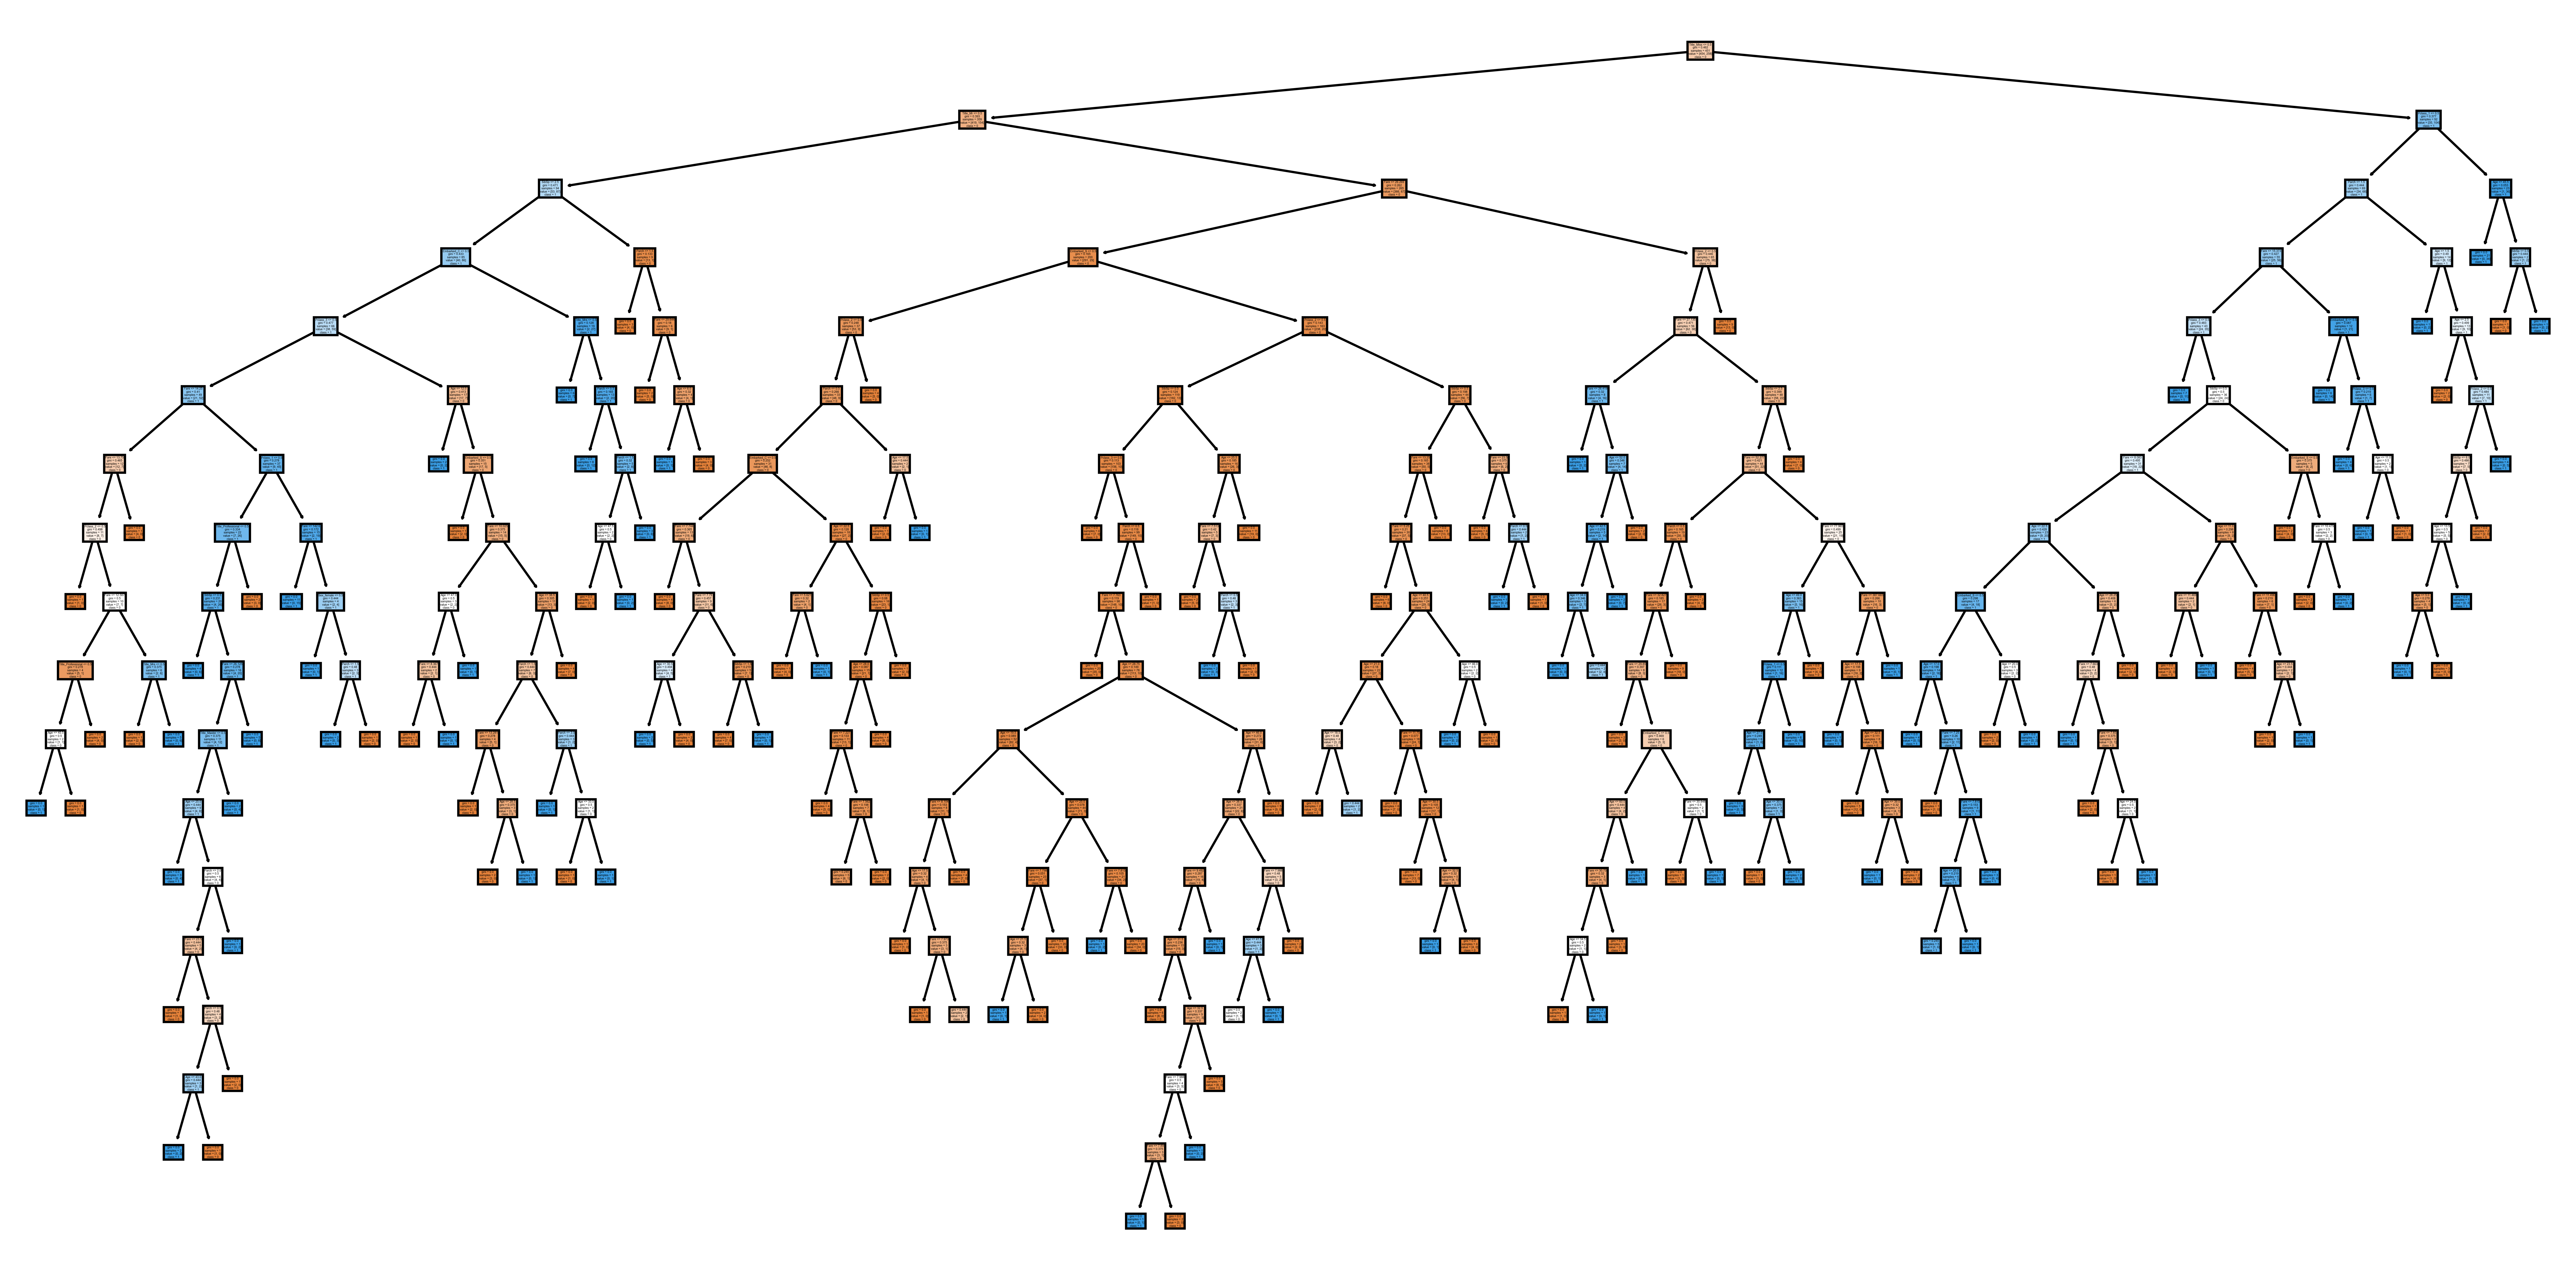

In [90]:
''' 
NOTE
----
The code in this cell is for the plotting of the first decision tree in the fitted Random Forest.
The output was saved as a .png file, so running this code again is optional. 
----
'''

'''
# plot decision tree
fig8, ax8 = plt.subplots(figsize=(20, 10), dpi=600)

cn = ["0", "1"] # names of the target classes
fn = features_train.columns.to_list() # names of the features

with plt.style.context('default'): # reset style sheet reference (otherwise decision tree not readable)
    plot_tree(rnd_forest.estimators_[0], feature_names=fn, class_names=cn , filled=True, ax=ax8)

# save figure as .png file
fig8.savefig("images/rnd_forest_Tree1.png")
'''

---
#### <span style='border:2px solid Khaki'>Summary - Model development</span>

- Dummy variables were created for all categorical features in `df_train` and `df_test` datasets<br>
<br>
- Data in `df_train` dataset was split into a *training subset* and a *testing subset* using stratify sampling<br>
<br>
- A Random Forest Classifier was created and fitted using the *training subset*

---
---

# <span style='background:aliceblue'>5. Model evaluation and final predictions</span>

In this final section, we will be interested in seeing how our model performs at predicting unseen data before generating predictions on the survival of the passengers in `df_test` dataset.  

- The Out-Of-Bag (OOB) score

When creating the Random Forest, we selected the option to train it using bootstrap aggregation ("bagging"). Each new tree was therefore fitted using a bootstrap sample, and observations which were not contained in their respective bootstrap sample were predicted from the respective tree.

In [91]:
# return OOB error for the Random Forest
1 - rnd_forest.oob_score_

0.1910112359550562

**Comment**: The above error is an estimate of the true generalisation error of our model, and shows that predictions were not accurate for around 19.10% of the OOB samples. 

- Accuracy classification score and confusion matrix

Here, we use the fitted model to predict the survival of passengers in the *testing subset*:

In [92]:
# predict classes 
yhat = rnd_forest.predict(X_test)

In [93]:
# return accuracy classification score
accuracy_score(y_test, yhat)

0.8324022346368715

**Comment**: Around 83.24% of the predictions made for the passengers in the *testing subset* were accurate. This results in an error of around 16.76% which is less than 3% under the previously calculated OOB error. 

The accuracy classification score alone is not sufficient enough to assess the performance of our model. While the score may seem high and may appear to be *good*, it does not provide any information as to ***where*** our model performs well. However, a confusion matrix will give us more insight by evaluating the quality of the output of our model:

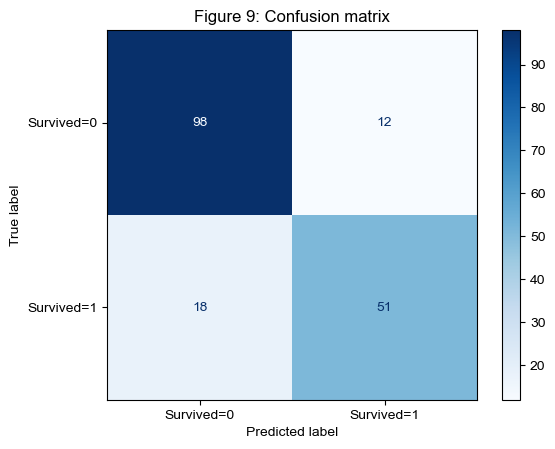

In [94]:
# plot confusion matrix
class_names = ["Survived=0", "Survived=1"]

with plt.style.context("default"):
    disp = plot_confusion_matrix(rnd_forest, X_test, y_test, display_labels=class_names, cmap="Blues")
    disp.ax_.set_title("Figure 9: Confusion matrix")

plt.show()

**Comments**: Out of the 179 passengers in the *testing subset*, 110 died (the negative class) in the accident while 69 survived (the positive class).

Out of the 110 passengers who did not survive the accident, the model correctly identifies 98 as victims which results in a 89.09% recall for the negative class. However out of the 69 passengers who did survive, the model correctly identifies 51 as survivors which results in an 73.91% recall for the positive class. Our model therefore seems to perform better at identifying the negative class.<br>
This could be explained by the class imbalance within the dataset we have been working with: the negative class was largely more represented than the positive class so the model has seen more data from the negative class when it was being trained.

The main classification metrics - such as the precision and recall for each class - can be calculated using the confusion matrix. With Scikit-Learn, these are generated via the following function:

In [95]:
print(classification_report(y_test, yhat, target_names=class_names))

              precision    recall  f1-score   support

  Survived=0       0.84      0.89      0.87       110
  Survived=1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Comment**: The report provides the recall for each class, and these values are consistent with our analysis of the confusion matrix. When it comes to the precisions, the one for the negative class (0.84) is slightly higher than for the positive class (0.81). Another interesting metric is the F1-score which is defined as the harmonic mean between the recall and the precision. We can see that it is higher for the negative class (0.87) compared to the positive class (0.77). 

- Final predictions and cross-validation

It is now time to train the model with the features and target from the entire `df_train` dataset to create the final predictive model. A k-fold cross-validation will then be performed, and we will finally generate predictions for the passengers in the `df_test` dataset.

In [96]:
# fit Random Forest object
rnd_forest.fit(features_train, target)

RandomForestClassifier(oob_score=True, random_state=42)

In [97]:
# return OOB error for the Random Forest
1 - rnd_forest.oob_score_

0.18181818181818177

**Comment**: Using all available data to train the model resulted in a decrease of the OOB score. 

In [98]:
# k-fold cross-validation
AccCross = cross_val_score(rnd_forest, features_train, target, cv=5)
AccCross

array([0.81005587, 0.78089888, 0.85955056, 0.76966292, 0.8258427 ])

In [99]:
print("The mean classification accuracy of the folds is {}, and the standard deviation is {}".format(AccCross.mean(), AccCross.std()))

The mean classification accuracy of the folds is 0.8092021844203126, and the standard deviation is 0.03217770996244641


In [100]:
# final predictions
final_pred = rnd_forest.predict(features_test)

In [101]:
# create submission file
submission = pd.DataFrame(data=final_pred, index=features_test.index, columns=["Survived"], dtype="str")
submission.to_csv("submission.csv")

---
#### <span style='border:2px solid Khaki'>Summary - Model evaluation and final predictions</span>

- When evaluating the output of our model after being trained on the *testing subset*, we concluded that it performs better at identifying the negative class than at identifying the positive class<br>
<br>
- The final predictive model was obtained by training it on the features and target from the entire `df_train` dataset<br>
<br>
- Predictions on the survival of the passengers in `df_test` dataset were generated using the final predictive model and shared via the Kaggle competition: we obtained a classification accurary score of **0.75119**.<br>
<br>

<img src="images/public_score_Kaggle.png" width="800" />

---
---

***Thank you for reading this Notebook!***
<br>
<br>